# **Tidying**

Part of the data engineering process is data cleaning and tidying. What is done in those two processes, is trying to make the data more readable, and complete. This makes much easier to analyze, visualize, and train the data.


## **Data Tidying**

Making the data more organized, and readable is the result of applying data tidying. 

In this section two main pandas functions are used in data tidying those are `melt` and `pivot_table`.

Let's start by taking a look at the below dataframe, which represents the income ranges based on religion. This is part of the PEW research, which is famous in the US for conducting pollings and surveys on citizens.

When the following are satisfied:


1. Each variable forms a column
2. Each observation forms a row
3. Each type of observational unit forms a table

We can then say that our dataset is *tidy*.

First we need to import pandas to read csv datasets.

## Import libraies and read datatsets
* import pandas and numpy for handling data
* import re for regular expressions for section 2 to filter and menlt bilboard chart data

In [2]:

import pandas as pd
import numpy as np
import re


### **PEW Research Dataset**

1. Start by Importing the dataset into a pandas dataframe.

In [3]:
data = pd.read_csv("data/pew-raw.csv")
data

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58
3,Catholic,418,617,732,670,638,1116
4,Dont know/refused,15,14,15,11,10,35
5,Evangelical Prot,575,869,1064,982,881,1486
6,Hindu,1,9,7,9,11,34
7,Historically Black Prot,228,244,236,238,197,223
8,Jehovahs Witness,20,27,24,24,21,30
9,Jewish,19,19,25,25,30,95


2. Observe the dataset using the `loc`, `iloc`, `head`, or `tail` approaches
* head show top 5 rows of the df and user can pass the number
* tail show bottom 5 rows of the dataframe and can also pass the number in the blackets
* loc show rows by index labels
* iloc show rows by index positions


In [121]:
# head show top 5 rows of the dataframe
data.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58
3,Catholic,418,617,732,670,638,1116
4,Dont know/refused,15,14,15,11,10,35


In [122]:
# tail show bottom 5 rows of the dataframe 
data.tail()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
5,Evangelical Prot,575,869,1064,982,881,1486
6,Hindu,1,9,7,9,11,34
7,Historically Black Prot,228,244,236,238,197,223
8,Jehovahs Witness,20,27,24,24,21,30
9,Jewish,19,19,25,25,30,95


In [123]:
# loc show rows by index labels
data.loc[0:3]

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58
3,Catholic,418,617,732,670,638,1116


In [124]:
# iloc show rows by index positions
data.iloc[0:3]

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58


***What does not seem right in the above dataframe?***

Looking at the dataframe
* The columns after religion( 10k,10-20k..) retpresent icnome ranges.
* Theses are actually values of a variable(income_range) rather than varialbes themselves.
* the dataset is in a wide format, each income range is a column
* to be tidy, income ranges should be a variable(one_column), and the values(counts of people) should be another column
    * so the dataset violates rule #! of tidy data
    * Each variable must have ite own column

3. Try to make the column headers represent a variable not a value. For that, use the `melt` function.

* In the previous approach, each income range was a separate column.
* So, I just used the melt function to show the income ranges in a single column
* id_vars is the religion column, and var name is the income_range column
* value name is the count column

In [125]:
df_tidy = data.melt(id_vars=["religion"], var_name="income_range", value_name="count")
df_tidy

,religion,income_range,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Dont know/refused,<$10k,15
5,Evangelical Prot,<$10k,575
6,Hindu,<$10k,1
7,Historically Black Prot,<$10k,228
8,Jehovahs Witness,<$10k,20
9,Jewish,<$10k,19


## 3-1 Pivot table
* Crate a pivot table that show the count of each income range for each religion
* If we ingore this ordering, the pivot table's columns will be sorted weirdly
* so I just set the order manually here

In [126]:
# If we ingore this ordering, the pivot table's columns will be sorted weirdly
# so I just set the order manually here
income_range_order = [ "<$10k", "$10-20k", "$20-30k", "$30-40k", "$50-75k"]
df_tidy["income_range"] = df_tidy["income_range"].astype(str).str.strip()
df_tidy["income_range"] = pd.Categorical(df_tidy["income_range"], categories=income_range_order, ordered=True)

pivot_table = df_tidy.pivot_table(index="religion", columns="income_range", values="count")
pivot_table

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21320\3960351333.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_tidy.pivot_table(index="religion", columns="income_range", values="count")


income_range,<$10k,$10-20k,$20-30k,$30-40k,$50-75k
religion,,,,,
Agnostic,27.0,34.0,60.0,81.0,137.0
Atheist,12.0,27.0,37.0,52.0,70.0
Buddhist,27.0,21.0,30.0,34.0,58.0
Catholic,418.0,617.0,732.0,670.0,1116.0
Dont know/refused,15.0,14.0,15.0,11.0,35.0
Evangelical Prot,575.0,869.0,1064.0,982.0,1486.0
Hindu,1.0,9.0,7.0,9.0,34.0
Historically Black Prot,228.0,244.0,236.0,238.0,223.0
Jehovahs Witness,20.0,27.0,24.0,24.0,30.0


### **Billboard Dataset**

This dataset outlines data about the top hit songs on the Billboard list and the week from entrance that it was in the billboard with the ranking.

1. Read the dataset and store it in a pandas dataframe. Note that the usual utf-8 encoding does not work on this dataset. The reason behind this is that there might be characters that are not supported by `utf-8`.

The suggestion is to use for this dataset `unicode_escape` encoding. (converts all non-ASCII characters into their \uXXXX representations)

* load the billboard dataset
* and to avoid the encoding error, i just added the encoding parameter (unicode_escape)

In [4]:

df = pd.read_csv("data/billboard.csv",encoding="unicode_escape")

2. Observe the first few rows of the dataset.

In [5]:
# show the first five row to observe
df.head()

# show the summary of the dataframe to observe to check how many columns 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             317 non-null    int64  
 1   artist.inverted  317 non-null    object 
 2   track            317 non-null    object 
 3   time             317 non-null    object 
 4   genre            317 non-null    object 
 5   date.entered     317 non-null    object 
 6   date.peaked      317 non-null    object 
 7   x1st.week        317 non-null    int64  
 8   x2nd.week        312 non-null    float64
 9   x3rd.week        307 non-null    float64
 10  x4th.week        300 non-null    float64
 11  x5th.week        292 non-null    float64
 12  x6th.week        280 non-null    float64
 13  x7th.week        269 non-null    float64
 14  x8th.week        260 non-null    float64
 15  x9th.week        253 non-null    float64
 16  x10th.week       244 non-null    float64
 17  x11th.week      

***What is wrong with the above dataset?***
* This dataset also has multiple columns(wide format) for weeks. So I need to reshape it to a tidy format by using the melt function.

## 3. Let's, again, use the `melt` function to fix the general structure of the dataframe.
* Step1. There are specific format of the week columns so I just use the regex to filter
    1) **^, $**: start and end of the string
    2) **\d+**: one or more digits
    3) **(?:st|nd|rd|th)**: non-capturing group
    4) Regex from AI
* Step2. Create two lists to define id_vars and value_vars to melt function

In [129]:
# regex to filter the week columns
reg = r"^x(\d+)(?:st|nd|rd|th)\.week$"
# define the pattern with re.IGNORECASE to ignore the case sensitivity
pattern = re.compile(reg, re.IGNORECASE)


# separate the week columns and id_vars columns
week_cols = []
id_vars   = []

for column in df.columns:
    temp_column = str(column)
    # use fullmatch to check if the entire string matches the pattern
    is_true = pattern.fullmatch(temp_column)
    if is_true:
        week_cols.append(temp_column)
    else:
        # add to id_vars if not match
        id_vars.append(temp_column)

tidy_df = df.melt(id_vars=id_vars, value_vars=week_cols, var_name="week", value_name="rank")
tidy_df


,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,x1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,x1st.week,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,x1st.week,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x1st.week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,x1st.week,57.0
...,...,...,...,...,...,...,...,...,...
24087,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,x76th.week,NaN
24088,2000,"Smith, Will",Freakin' It,3:58,Rap,2000-02-12,2000-02-12,x76th.week,NaN
24089,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,x76th.week,NaN
24090,2000,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,2000-07-01,x76th.week,NaN


If we inspect the current dataframe. We find that it is structured in a better way than before. 

However, the ***Week*** column looks a bit ugly!

## 4. Let's try to place only the week number in that column without the extras surronding it.
* using extract function to extract only week number in the value

In [130]:
tidy_df["week"] = tidy_df["week"].str.extract(r"(\d+)").astype(int)

## 5. Now let's inspect the ***Week*** column in the dataframe.
* describe dataframe like count, mean, max but not relevant yet
* inspect null values in each column

In [131]:

tidy_df.describe()

tidy_df.isnull().sum()

year                   0
artist.inverted        0
track                  0
time                   0
genre                  0
date.entered           0
date.peaked            0
week                   0
rank               18785
dtype: int64

Next, let's try to find the date at which the song ranked the number that is shown per row.

## 6. To do that let's first think of the equation that is going to get us the relevant date at which the song ranked the *rth*.


* Convert the date.entered column to datetime type 
* Use Timedelta (day based calculation) to represent the time difference
* Calculate date.entered and week to compute the actual date (date.ranked) at which each row’s rank was recorded.


*Timedeltas are absolute differences in times, expressed in difference units (e.g. days, hours, minutes, seconds). This method converts an argument from a recognized timedelta format / value into a Timedelta type.*

* reference: https://pandas.pydata.org/docs/reference/api/pandas.Timedelta.html


In [132]:

tidy_df["date.entered"] = pd.to_datetime(tidy_df["date.entered"])

one_week_timedelta = pd.Timedelta(weeks=1)

tidy_df["date.ranked"] = tidy_df["date.entered"] + (tidy_df["week"] - 1) * one_week_timedelta


# we can use to_timedelta directly on the series, but rubric says to use Timedelta.

# tidy_df["date.ranked"]= tidy_df["date.entered"] + pd.Timedelta.to_timedelta((tidy_df["week"]-1)*7, "d")


In [133]:
tidy_df

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank,date.ranked
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78.0,2000-09-23
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1,15.0,2000-02-12
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1,71.0,1999-10-23
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1,41.0,2000-08-12
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1,57.0,2000-08-05
...,...,...,...,...,...,...,...,...,...,...
24087,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,76,NaN,2002-01-12
24088,2000,"Smith, Will",Freakin' It,3:58,Rap,2000-02-12,2000-02-12,76,NaN,2001-07-21
24089,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,76,NaN,2002-02-09
24090,2000,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,2000-07-01,76,NaN,2001-12-08


***What is the problem with the calculation above?***
* Answer: No issue with the calculation itself, but it will fail if date.entered is not converted to datetime

## 7. Let's only keep necessary columns
* There was no specific requirement
* so I just keep the columns I find necessary: artist.inverted, track, date_entered, rank, and date.ranked

In [134]:
necessary_columns = ["artist.inverted", "track", "date.entered", "rank", "date.ranked"]
tidy_df = tidy_df[necessary_columns]
tidy_df

,artist.inverted,track,date.entered,rank,date.ranked
0,Destiny's Child,Independent Women Part I,2000-09-23,78.0,2000-09-23
1,Santana,"Maria, Maria",2000-02-12,15.0,2000-02-12
2,Savage Garden,I Knew I Loved You,1999-10-23,71.0,1999-10-23
3,Madonna,Music,2000-08-12,41.0,2000-08-12
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),2000-08-05,57.0,2000-08-05
...,...,...,...,...,...
24087,Ghostface Killah,Cherchez LaGhost,2000-08-05,NaN,2002-01-12
24088,"Smith, Will",Freakin' It,2000-02-12,NaN,2001-07-21
24089,Zombie Nation,Kernkraft 400,2000-09-02,NaN,2002-02-09
24090,"Eastsidaz, The",Got Beef,2000-07-01,NaN,2001-12-08


## 8. How to rename your columns?
* Use the built in funtion called rename to standardize column names.
* "." hinder attribute-style access, so I replace them "_" and use snake_case.

In [135]:
tidy_df = tidy_df.rename(columns={
    "artist.inverted": "artist",
    "date.entered": "date_entered",
    "date.ranked": "date_ranked"
})

Display the dataframe

In [136]:
display(tidy_df)

,artist,track,date_entered,rank,date_ranked
0,Destiny's Child,Independent Women Part I,2000-09-23,78.0,2000-09-23
1,Santana,"Maria, Maria",2000-02-12,15.0,2000-02-12
2,Savage Garden,I Knew I Loved You,1999-10-23,71.0,1999-10-23
3,Madonna,Music,2000-08-12,41.0,2000-08-12
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),2000-08-05,57.0,2000-08-05
...,...,...,...,...,...
24087,Ghostface Killah,Cherchez LaGhost,2000-08-05,NaN,2002-01-12
24088,"Smith, Will",Freakin' It,2000-02-12,NaN,2001-07-21
24089,Zombie Nation,Kernkraft 400,2000-09-02,NaN,2002-02-09
24090,"Eastsidaz, The",Got Beef,2000-07-01,NaN,2001-12-08


In the above dataframe, there are some *NaN* values. What are we going to do? <br/>
## 9. Apply quick data cleaning and then observe the dataset

* For NaN values, I can either fill them with "NaN" or remove them.
* However, I think rows without valid rank have no analytical value, so I just drop those rows from the dataset

In [137]:
# drop missing values in rank column
cleaned_df = tidy_df.dropna(subset=["rank"])

# change the rank column to integer
cleaned_df["rank"] = cleaned_df["rank"].astype(int)

# change date_entered, date_ranked to date type and format like YYYY-MM-DD
cleaned_df["date_entered"] = pd.to_datetime(cleaned_df["date_entered"]).dt.date
cleaned_df["date_ranked"] = pd.to_datetime(cleaned_df["date_ranked"]).dt.date

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21320\2266651551.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["rank"] = cleaned_df["rank"].astype(int)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21320\2266651551.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["date_entered"] = pd.to_datetime(cleaned_df["date_entered"]).dt.date
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21320\2266651551.py:9: SettingWithCopyWarning: 
A value is trying to be se

## Additional show dataframe when each track was at its highest rank


In [138]:
#cleaned_df["artist"].unique()

ranking_first_df = cleaned_df[cleaned_df["rank"] == 1]
ranking_first_df= ranking_first_df.sort_values(["artist","track","date_ranked"]).groupby(["artist","track"]).first().reset_index()
ranking_first_df

,artist,track,date_entered,rank,date_ranked
0,Aaliyah,Try Again,2000-03-18,1,2000-06-17
1,"Aguilera, Christina",Come On Over Baby (All I Want Is You),2000-08-05,1,2000-10-14
2,"Aguilera, Christina",What A Girl Wants,1999-11-27,1,2000-01-15
3,"Carey, Mariah",Thank God I Found You,1999-12-11,1,2000-02-19
4,Creed,With Arms Wide Open,2000-05-13,1,2000-11-11
5,Destiny's Child,Independent Women Part I,2000-09-23,1,2000-11-18
6,Destiny's Child,Say My Name,1999-12-25,1,2000-03-18
7,"Iglesias, Enrique",Be With You,2000-04-01,1,2000-06-24
8,Janet,Doesn't Really Matter,2000-06-17,1,2000-08-26
9,Lonestar,Amazed,1999-06-05,1,2000-03-04


## **Data Cleaning**

Data cleaning involves removing unwanted characters, imputing, or dropping missing values.

The decision is based on the dataset you have, and the information you can extract from the other columns.


Examples of data cleaning include cleaning:

1.   **Missing Data**
2.   **Irregular Data** (Outliers)
3.   **Unnecessary Data** — Repetitive Data, Duplicates and more
4.   **Inconsistent Data** — Capitalization, Addresses and more








### **Cars Data Set**

## Start by reading the dataset related to car models: ./CSVs/cars.csv
* car dataset delimited by semicolon so we need to specify sep=";"

In [6]:
df = pd.read_csv("data/cars.csv",sep=";")
df

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,STRING,DOUBLE,INT,DOUBLE,DOUBLE,DOUBLE,DOUBLE,INT,CAT
1,Chevrolet Chevelle Malibu,NaN,8,307.0,130.0,3504.,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,NaN,3693.,11.5,70,US
3,Plymouth Satellite,NaN,8,318.0,150.0,3436.,11.0,70,US
4,AMC Rebel SST,16.0,8,NaN,150.0,NaN,12.0,70,US
...,...,...,...,...,...,...,...,...,...
402,Ford Mustang GL,27.0,4,140.0,86.00,2790.,15.6,82,US
403,Volkswagen Pickup,44.0,4,97.00,52.00,2130.,24.6,82,Europe
404,Dodge Rampage,32.0,4,135.0,84.00,2295.,11.6,82,US
405,Ford Ranger,28.0,4,120.0,79.00,2625.,18.6,82,US


## First Row seems to be the datatype, we need to remove it
* Using iloc to remove the first row(index 1 = data type row)

In [140]:
df = df.iloc[1:].reset_index(drop=True)
df

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,NaN,8,307.0,130.0,3504.,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,NaN,3693.,11.5,70,US
2,Plymouth Satellite,NaN,8,318.0,150.0,3436.,11.0,70,US
3,AMC Rebel SST,16.0,8,NaN,150.0,NaN,12.0,70,US
4,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US
...,...,...,...,...,...,...,...,...,...
401,Ford Mustang GL,27.0,4,140.0,86.00,2790.,15.6,82,US
402,Volkswagen Pickup,44.0,4,97.00,52.00,2130.,24.6,82,Europe
403,Dodge Rampage,32.0,4,135.0,84.00,2295.,11.6,82,US
404,Ford Ranger,28.0,4,120.0,79.00,2625.,18.6,82,US


Let's observe the columns with null values.  Either by using the `isnull().sum()` function 

In [141]:
print(df.dtypes)
print("---------------------------------")
print("Missing values per column")
print(df.isna().sum())

Car             object
MPG             object
Cylinders       object
Displacement    object
Horsepower      object
Weight          object
Acceleration    object
Model           object
Origin          object
dtype: object
---------------------------------
Missing values per column
Car             0
MPG             3
Cylinders       0
Displacement    1
Horsepower      2
Weight          1
Acceleration    0
Model           0
Origin          0
dtype: int64


There aren't many missing values. Let's take a glimpse at the percentage of the missing values:

**HINT:** We'll need `Numpy` for the below task.

In [142]:
import numpy as np
import matplotlib.pyplot as plt

In [143]:
total_value = df.size
# multiply all numbers in df.shape
total_value_np = np.product(df.shape)
missing_value = df.isna().sum().sum()
missing_percentage = round((missing_value / total_value) * 100,2)

print(f"Total cells using Pandas: {total_value}")
print(f"Total cells using Numpy: {total_value_np}")
print(f"Missing values: {missing_value}")
print(f"Missing percentage: {missing_percentage} %")



Total cells using Pandas: 3654
Total cells using Numpy: 3654
Missing values: 7
Missing percentage: 0.19 %


Around *0.19%* of the values are missing, which isn't a lot. Therefore, we might go with the option of dropping all the rows with null values.

* Option 1: Dropping row
    * By dropping missing row, we dropped 5 row in 406 rows(total)

In [144]:
raw_lenght = len(df)
df_drop_rows = df.dropna(axis=0)
df_drop_rows
dropped_rows_length = len(df_drop_rows)

print(f"before:{raw_lenght}, after dropping rows: {dropped_rows_length}, dropped {raw_lenght - dropped_rows_length} rows")

before:406, after dropping rows: 401, dropped 5 rows


Lets also check dropping the columns

In [145]:
df_drop_columns = df.dropna(axis=1)
df_drop_columns

,Car,Cylinders,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,8,12.0,70,US
1,Buick Skylark 320,8,11.5,70,US
2,Plymouth Satellite,8,11.0,70,US
3,AMC Rebel SST,8,12.0,70,US
4,Ford Torino,8,10.5,70,US
...,...,...,...,...,...
401,Ford Mustang GL,4,15.6,82,US
402,Volkswagen Pickup,4,24.6,82,Europe
403,Dodge Rampage,4,11.6,82,US
404,Ford Ranger,4,18.6,82,US


Let's observe how many columns we lost
* By dropping missing column, we lost 4 coulmn. So after dropping column, there are only 4. 
* It means we loose half of columns

In [146]:
before_columns_length = len(df.columns)
after_columns_length = len(df_drop_columns.columns)

print(f"before:{before_columns_length}, after dropping columns: {after_columns_length}, dropped {before_columns_length - after_columns_length} columns")

before:9, after dropping columns: 5, dropped 4 columns


### **Cars Dataset - Filling in missing values automatically**

Another option is to try and fill in the missing values through imputations.

Let's take the `MPG` column for example. We can fill in the missing values with 0s through the following line of code:

`df_cars.fillna(0) `. 

However, this does not make much sense as there isn't MPG equal to 0. How about we plot the MPG column and if it follows a random distribution we can use the mean of the column to compute the missing values. Otherwise, we can use the median (if there is a skewed normal distribution). However, there might be a better way of imputation which is getting the median or the mean of the MPG of the cars with similar attributes.

In [147]:
df_MPG_with_0 = df.copy()
df_MPG_with_0["MPG"] = pd.to_numeric(df_MPG_with_0["MPG"], errors="coerce")
df_MPG_with_0["MPG"] = df_MPG_with_0["MPG"].fillna(0)
df_MPG_with_0

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,0.0,8,307.0,130.0,3504.,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,NaN,3693.,11.5,70,US
2,Plymouth Satellite,0.0,8,318.0,150.0,3436.,11.0,70,US
3,AMC Rebel SST,16.0,8,NaN,150.0,NaN,12.0,70,US
4,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US
...,...,...,...,...,...,...,...,...,...
401,Ford Mustang GL,27.0,4,140.0,86.00,2790.,15.6,82,US
402,Volkswagen Pickup,44.0,4,97.00,52.00,2130.,24.6,82,Europe
403,Dodge Rampage,32.0,4,135.0,84.00,2295.,11.6,82,US
404,Ford Ranger,28.0,4,120.0,79.00,2625.,18.6,82,US


## Analysis Kihoon
* MPG = 0 does not make sense in this dataset.
* we can use either the mean or median to fill in the missing values.
* since the distribution of the MPG column is not skewed and shows a roughly bell-shaped pattern,
 i decided to use the mean value for imputation

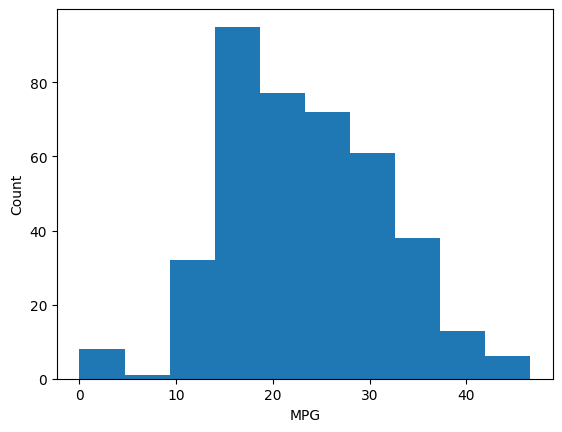

In [148]:

df_MPG_cars = df.copy()
df_MPG_cars["MPG"] = pd.to_numeric(df_MPG_cars["MPG"], errors="coerce")

df_MPG_cars["MPG"].dropna()
df_MPG_cars["MPG"].plot(kind="hist")
plt.xlabel("MPG")
plt.ylabel("Count")
plt.show()


If we observe the graph above, we can consider it in a way or another normally distributed. Therefore, we can impute the missing values using the mean.

To compute the mean we need numeric values. However the values in the dataframe are objects. Therefore, we need to change them to numerics so that we can compute them.

Now let's see what is the mean of the MPG column

We can use this mean to compute the missing values since the graph demonstarted a normal distribution

In [149]:
df_mean_imputed = df.copy()

df_mean_imputed["MPG"] = pd.to_numeric(df_mean_imputed["MPG"])
mean_MPG = df_mean_imputed["MPG"].mean()
print(f"Mean MPG value is: {mean_MPG}")

df_mean_imputed["MPG"] = df_mean_imputed["MPG"].fillna(mean_MPG)
df_mean_imputed

Mean MPG value is: 23.096277915632754


,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,23.096278,8,307.0,130.0,3504.,12.0,70,US
1,Buick Skylark 320,15.000000,8,350.0,NaN,3693.,11.5,70,US
2,Plymouth Satellite,23.096278,8,318.0,150.0,3436.,11.0,70,US
3,AMC Rebel SST,16.000000,8,NaN,150.0,NaN,12.0,70,US
4,Ford Torino,17.000000,8,302.0,140.0,3449.,10.5,70,US
...,...,...,...,...,...,...,...,...,...
401,Ford Mustang GL,27.000000,4,140.0,86.00,2790.,15.6,82,US
402,Volkswagen Pickup,44.000000,4,97.00,52.00,2130.,24.6,82,Europe
403,Dodge Rampage,32.000000,4,135.0,84.00,2295.,11.6,82,US
404,Ford Ranger,28.000000,4,120.0,79.00,2625.,18.6,82,US


### **Car Dataset - Simple Imputer**

*SimpleImputer* is a `scikit-learn` class which is helpful in handling the missing data in the predictive model dataset. It replaces the `NaN` values with a specified placeholder.
It is implemented by the use of the `SimpleImputer()` method which takes the following arguments :

`missing_values` : The missing_values placeholder which has to be imputed. By default is NaN

`strategy` : The data which will replace the NaN values from the dataset. The strategy argument can take the values – ‘mean'(default), ‘median’, ‘most_frequent’ and ‘constant’.


Let's start by importing the `SimpleImputer` into our notebook

In [150]:
from sklearn.impute import SimpleImputer

What we need to do are two essential steps:

1. fit the data (compute the mean / median / most freq)
    * mean is suitable for "MPG"
    * median is suitable for "Displacement"
        * The distripution looks right skewed pattern
2. transform the data (place the computed values in the NaN cells)

In [151]:
df_imputed_mean_MPG = df.copy()
# fit
imputer_mean = SimpleImputer(strategy='mean')
# transform
df_imputed_mean_MPG['MPG'] = imputer_mean.fit_transform(df_imputed_mean_MPG[['MPG']])
display(df_imputed_mean_MPG)

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,23.096278,8,307.0,130.0,3504.,12.0,70,US
1,Buick Skylark 320,15.000000,8,350.0,NaN,3693.,11.5,70,US
2,Plymouth Satellite,23.096278,8,318.0,150.0,3436.,11.0,70,US
3,AMC Rebel SST,16.000000,8,NaN,150.0,NaN,12.0,70,US
4,Ford Torino,17.000000,8,302.0,140.0,3449.,10.5,70,US
...,...,...,...,...,...,...,...,...,...
401,Ford Mustang GL,27.000000,4,140.0,86.00,2790.,15.6,82,US
402,Volkswagen Pickup,44.000000,4,97.00,52.00,2130.,24.6,82,Europe
403,Dodge Rampage,32.000000,4,135.0,84.00,2295.,11.6,82,US
404,Ford Ranger,28.000000,4,120.0,79.00,2625.,18.6,82,US


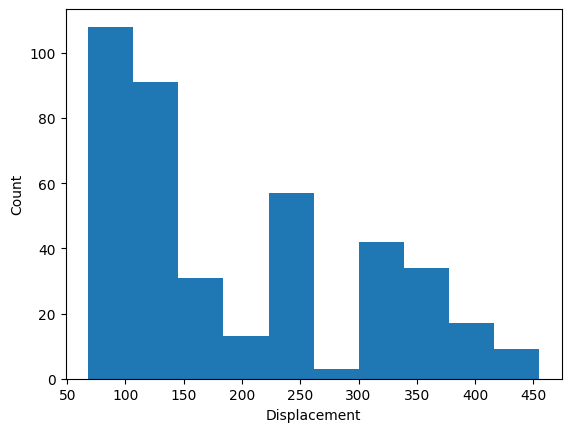

In [152]:

df_Displacement_cars = df.copy()
df_Displacement_cars["Displacement"] = pd.to_numeric(df_Displacement_cars["Displacement"], errors="coerce")


df_Displacement_cars["Displacement"].dropna()
df_Displacement_cars["Displacement"].plot(kind="hist")
plt.xlabel("Displacement")
plt.ylabel("Count")
plt.show()

In [153]:
df_imputed_median_displacement = df.copy()
# fit
imputer_midean = SimpleImputer(strategy='median')

# transform
df_imputed_median_displacement['Displacement'] = imputer_midean.fit_transform(df_imputed_median_displacement[['Displacement']])
display(df_imputed_median_displacement)

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,NaN,8,307.0,130.0,3504.,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,NaN,3693.,11.5,70,US
2,Plymouth Satellite,NaN,8,318.0,150.0,3436.,11.0,70,US
3,AMC Rebel SST,16.0,8,151.0,150.0,NaN,12.0,70,US
4,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US
...,...,...,...,...,...,...,...,...,...
401,Ford Mustang GL,27.0,4,140.0,86.00,2790.,15.6,82,US
402,Volkswagen Pickup,44.0,4,97.0,52.00,2130.,24.6,82,Europe
403,Dodge Rampage,32.0,4,135.0,84.00,2295.,11.6,82,US
404,Ford Ranger,28.0,4,120.0,79.00,2625.,18.6,82,US


## **Outlier Detection** 


An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. There are many ways to detect the outliers, and the removal process is the data frame same as removing a data item from the panda’s data frame.



https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/





In [154]:
# plotting

import sklearn
from sklearn.datasets import load_diabetes
import seaborn as sns

# Z score
from scipy import stats
import numpy as np


## Load diabetes data from sklearn
* load and store it in a dataframe

In [155]:
# Load diabetes data store it in a dataframe
diabetes = load_diabetes()

column = diabetes.feature_names
df = pd.DataFrame(diabetes.data, columns=column)

### Outliers Visualization

#### Visualizing Outliers Using Box Plot
It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

## Analysis by Kihoon Kim
* by visualizing using boxplot, we can easily see distribution and outlier
* The median is around 0.00.
* Most data points lie between -0.04 and +0.04 (Q1–Q3 range).
* Outliers appear above 0.12, while none exist on the lower side.
* Conclusion: These outliers may need to be removed or adjusted.

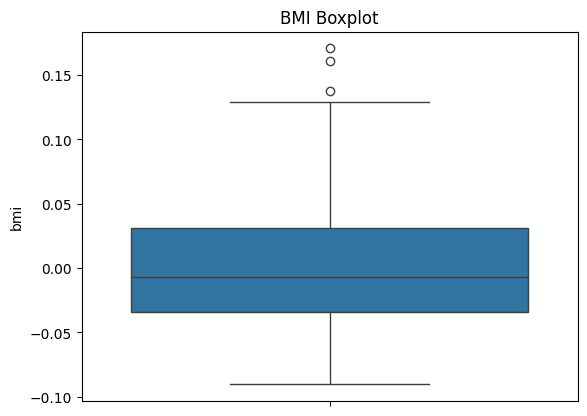

In [156]:
sns.boxplot(data=df["bmi"])
plt.title("BMI Boxplot")
plt.show()

#### Visualizing Outliers Using ScatterPlot.

It is used when you have paired numerical data and when your dependent variable has multiple values for each reading independent variable, or when trying to determine the relationship between the two variables. In the process of utilizing the scatter plot, one can also use it for outlier detection.

## Analysis by Kihoon Kim
* Both variables are numerical, a scatter plot helps visualize their relationship, patterns, and outliers.
* The plot shows a relatively positive correlation between BMI and Blood Pressure.
* Most data points are distributed between -0.04 and 0.04 for both variables.
* Outliers appear when BMI > 0.12 and BP > 0.11
* Conclusion: These outliers may need to be removed or adjusted.

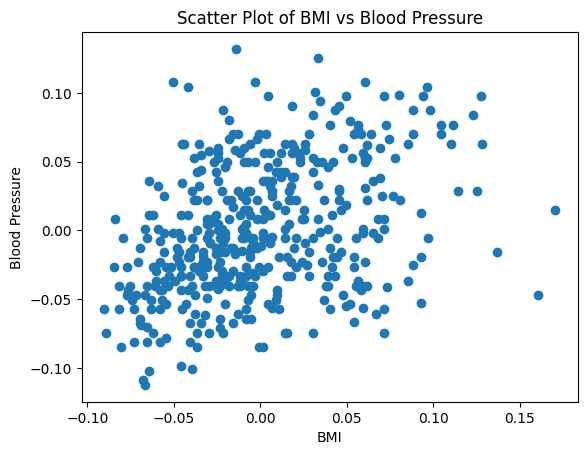

In [157]:
plt.scatter(df['bmi'], df['bp'])

plt.xlabel('BMI')
plt.ylabel('Blood Pressure')
plt.title('Scatter Plot of BMI vs Blood Pressure')

plt.show()


#### Z-Score:
Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.
<br>
Zscore = (data_point -mean) / std. deviation



## Analysis by Kihoon Kim
* Z-score shows how far a data point is from the mean in standard deviation
* Usually, |Z| > 3 indicates outliers, but here the threshold was set to 2
* values within ±2 standard deviations are considered normal.
* Conclusion: After removing 16 outliers from 442 rows, 426 rows remained.

In [158]:
z = np.abs(stats.zscore(df['age']))
print(z)

[0.80050009 0.03956713 1.79330681 1.87244107 0.11317236 1.94881082
 0.9560041  1.33508832 0.87686984 1.49059233 2.02518057 0.57139085
 0.34228161 0.11317236 0.95323959 1.1087436  0.11593688 1.48782782
 0.80326461 0.57415536 1.03237385 1.79607132 1.79607132 0.95323959
 1.33785284 1.41422259 2.25428981 0.49778562 1.10597908 1.41145807
 1.26148309 0.49778562 0.72413034 0.6477606  0.34228161 1.02960933
 0.26591186 0.19230663 0.03956713 0.03956713 0.11317236 2.10155031
 1.26148309 0.41865135 0.95323959 0.57139085 1.18511334 1.64333183
 1.41145807 0.87963435 0.72413034 1.25871858 1.1087436  0.19230663
 1.03237385 0.87963435 0.87963435 0.57415536 0.87686984 1.33508832
 1.49059233 0.87963435 0.57415536 0.72689486 1.41145807 0.9560041
 0.19230663 0.87686984 0.80050009 0.34228161 0.03956713 0.03956713
 1.33508832 0.26591186 0.26591186 0.19230663 0.65052511 2.02518057
 0.11317236 2.17792006 1.48782782 0.26591186 0.34504612 0.80326461
 0.03680262 0.95323959 1.49059233 0.95323959 1.1087436  0.95600

Now to define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

Rows where Z value is greater than 2

In [159]:
outliers_z = df[z > 2]
outliers_z

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
10,-0.096328,-0.044642,-0.083808,0.008101,-0.103389,-0.090561,-0.013948,-0.076395,-0.062917,-0.034215
26,-0.107226,-0.044642,-0.077342,-0.026328,-0.089630,-0.096198,0.026550,-0.076395,-0.042571,-0.005220
41,-0.099961,-0.044642,-0.067641,-0.108956,-0.074494,-0.072712,0.015505,-0.039493,-0.049872,-0.009362
77,-0.096328,-0.044642,-0.036385,-0.074527,-0.038720,-0.027618,0.015505,-0.039493,-0.074093,-0.001078
79,-0.103593,-0.044642,-0.037463,-0.026328,0.002559,0.019980,0.011824,-0.002592,-0.068332,-0.025930
106,-0.096328,-0.044642,-0.076264,-0.043542,-0.045599,-0.034821,0.008142,-0.039493,-0.059471,-0.083920
131,-0.096328,-0.044642,-0.069797,-0.067642,-0.019456,-0.010708,0.015505,-0.039493,-0.046883,-0.079778
204,0.110727,0.050680,0.006728,0.028758,-0.027712,-0.007264,-0.047082,0.034309,0.002004,0.077622
223,-0.099961,-0.044642,-0.023451,-0.064199,-0.057983,-0.060186,0.011824,-0.039493,-0.018114,-0.050783
226,-0.103593,0.050680,-0.046085,-0.026328,-0.024960,-0.024800,0.030232,-0.039493,-0.039809,-0.054925


In [160]:
threshold_z = 2

outliers_np = np.where(z > threshold_z)
no_outliers_np = np.where(z <= threshold_z)[0] # indexes of non-outliers

no_outliers_np_df = df.iloc[no_outliers_np]


print("Original DataFrame Shape:", df.shape)
print("After Removing Outliers:", no_outliers_np_df.shape)

Original DataFrame Shape: (442, 10)
After Removing Outliers: (426, 10)


#### IQR (Inter-Quartile Range)
Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field. <Br>

IQR = Quartile3 - Quartile1

## Analysis by Kihoon Kim
* IQR detects outliers based on the middle 50% range of the data.
* Q1 represents the 25th percentile, Q3 the 75th percentile, and IQR = Q3 − Q1.
* Result: IQR = about 0.0652


In [161]:

# Based on Lab class material
# df_bmi = df["bmi"]
# Q1 = df_bmi.quantile(0.25)
# Q3 = df_bmi.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

# Based on geeksforgeeks shared by professor
Q1 = np.percentile(df['bmi'], 25, method='midpoint')
Q3 = np.percentile(df['bmi'], 75, method='midpoint')
IQR = Q3 - Q1
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")





Q1: -0.03422906805670789, Q3: 0.03097856241308049, IQR: 0.06520763046978838


To define the outlier base value is defined above and below dataset’s normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :<br>
upper = Q3 + 1.5 * IQR <br>
lower = Q1 - 1.5 * IQR <br> 


## Analysis by Kihoon Kim
* Lower bound = about -0.13
* Upper bound = about 0.13
* 3 outliers were identified.

In [162]:
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print(f"Lower bound: {lower}, Upper bound: {upper}")
outliers_iqr = df[(df['bmi'] < lower) | (df['bmi'] > upper)]
outliers_iqr

Lower bound: -0.13204051376139045, Upper bound: 0.12879000811776306


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
256,-0.049105,-0.044642,0.160855,-0.046985,-0.029088,-0.019790,-0.047082,0.034309,0.028020,0.011349
366,-0.045472,0.050680,0.137143,-0.015999,0.041086,0.031880,-0.043401,0.071210,0.071019,0.048628
367,-0.009147,0.050680,0.170555,0.014987,0.030078,0.033759,-0.021311,0.034309,0.033654,0.032059


- Removing the outliers:
For removing the outlier, one must follow the same process of removing an entry from the dataset using its exact position in the dataset because in all the above methods of detecting the outliers end result is the list of all those data items that satisfy the outlier definition according to the method used.

## Analysis by Kihoon Kim
* Using np.where(), the indices of outliers were found and dropped from the dataset.
* 3 outliers were removed, leaving 439 rows in total.

In [163]:
df_IQR = df.copy()
upper_outliers = np.where(df_IQR['bmi'] >= upper)[0] # indexes of upper outliers
lower_outliers = np.where(df_IQR['bmi'] <= lower)[0] # indexes of lower outliers

df_IQR.drop(index=upper_outliers, inplace=True)
df_IQR.drop(index=lower_outliers, inplace=True)

print("Original DataFrame Shape:", df.shape)
print("After Removing Outliers:", df_IQR.shape)

Original DataFrame Shape: (442, 10)
After Removing Outliers: (439, 10)
